<a href="https://colab.research.google.com/github/shainaboover/DS-Unit-1-Sprint-2-Statistics/blob/master/SHAINA_BOOVER_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [61]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [62]:
# assign values
# true pos rate
p_pos_drunk = 1
# prior probability
p_drunk_prior = .001
# false pos rate
p_pos_not_drunk = .08
# complement of prior
p_not_drunk = 1 - p_drunk_prior
# plug values into bayes theorem
numerator = p_pos_drunk * p_drunk_prior
denominator = (p_pos_drunk * p_drunk_prior) + (p_pos_not_drunk * p_not_drunk)
post_prob1 = numerator / denominator
post_prob1

0.012357884330202669

In [63]:
# what's the probabiltiy of bring drunk after 2 tests?
p_pos_drunk = 1
# prior probability - update prior probability with new info
p_drunk_prior_2 = 0.012357884330202669
p_pos_not_drunk = .08
p_not_drunk = 1 - p_drunk_prior_2
numerator = p_pos_drunk * p_drunk_prior_2
denominator = (p_pos_drunk * p_drunk_prior_2) + (p_pos_not_drunk * p_not_drunk)
post_prob2 = numerator / denominator
post_prob2

0.13525210993291495

In [0]:
# define function to run bayes theorem several times
def prob_drunk_given_positive(p_drunk_prior, true_pos_rate, false_pos_rate, number_of_tests):
  post_prob = p_drunk_prior
  for x in range(0, number_of_tests):
    p_drunk = post_prob
    p_not_drunk = 1 - p_drunk
    p_pos_drunk = true_pos_rate
    p_pos_not_drunk = false_pos_rate
    post_prob = (p_pos_drunk * p_drunk) / ((p_pos_drunk * p_drunk) + (p_pos_not_drunk * p_not_drunk))
  return post_prob

In [65]:
# test it out, input parameters 
prob_drunk_given_positive(1/1000, 1, .08, 4)

0.9606895076105054

In [0]:
# create a sample aka define event space
coinflips = np.random.binomial(n=1, p=.5, size=100)

In [67]:
# get the sample mean
coinflips.mean()

0.44

In [70]:
# Frequentist approach
conf_freq = stats.t.interval(.95,
                            len(coinflips),
                            loc=np.mean(coinflips),
                            scale=stats.sem(coinflips))
conf_freq

(0.34102211083791756, 0.5389778891620824)

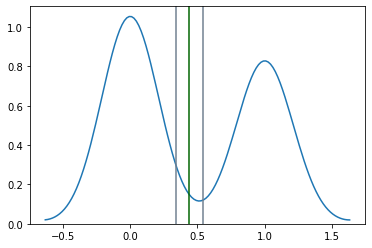

In [75]:
# plot using frequentist 
import matplotlib.pyplot as plt

sns.kdeplot(coinflips)
plt.axvline(x=conf_freq[0], color='slategrey')
plt.axvline(x=conf_freq[1], color='slategrey')
plt.axvline(x=np.mean(coinflips), color='darkgreen');

In [71]:
# Bayesian approach
conf_bayes = stats.bayes_mvs(coinflips, alpha=.95)[0][1]
conf_bayes

(0.3410098664856729, 0.5389901335143271)

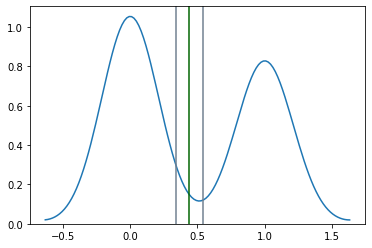

In [76]:
# plot with bayes
sns.kdeplot(coinflips)
plt.axvline(x=conf_bayes[0], color='slategrey')
plt.axvline(x=conf_bayes[1], color='slategrey')
plt.axvline(x=np.mean(coinflips), color='darkgreen');

Frequentist statistics makes inferences based on a sample of data. Bayesian statistics takes into account the prior beliefs we have about the data.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!